<img src="https://dev.skillup.online/asset-v1:SkillUp+SKOAI101+PLU_2021_1+type@asset+block@SKO.png" width="250" align="center">

<h1 align="center"><font size="5"> Analyzing and Visualizing Heart Failure Prediction Data</font></h1>

## Importing Libraries

In [4]:
# import libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Reading Data Set

In [5]:
# Read the data set using read_csv function

df=pd.read_csv("E:\SKillUp\Module - AI foundations\PRojects\Heart Failure\Heart_Failure.xls")

### Get glimpse of data

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
0,75.0,0,582,0,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,0,327000.00,2.7,116,0,0,1


In [36]:
df.shape

(299, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex/Week                  299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 25.8 KB


In [39]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [40]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex/Week,0.065430,-0.094769,0.079791,-0.157730,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316
smoking,0.018668,-0.107290,0.002421,-0.147173,-0.055711,0.028234,-0.027414,0.004813,0.445892,1.000000,-0.012623


### Q1. Create new dataframe <code>df_old</code> with <code>age>=60</code> and replace all the values in <code>age</code> column of <code>df_old</code> with <code>old age</code>

In [15]:
# Write your code here
df_old=df[df['age'] >=60]
pd.set_option('mode.chained_assignment', None)
df_old['age'] = 'old age'
df_old.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
0,old age,0,582,0,1,265000.0,1.9,130,1,0,1
2,old age,0,146,0,0,162000.0,1.3,129,1,1,1
4,old age,1,160,1,0,327000.0,2.7,116,0,0,1
5,old age,1,47,0,1,204000.0,2.1,132,1,1,1
6,old age,1,246,0,0,127000.0,1.2,137,1,0,1


<details><summary>Click Here for the Hint</summary>

 

```
    df_old=df[df['age'] >=60]
    df_old['age']='old age'

 

```

 

</details>

### Q2. Create new dataframe <code>df_middle_age</code> with <code>age</code>< 60 and replace all the values in <code>age</code> column of <code>df_middle_age</code> with <code>middle age</code>

In [16]:
# Write your code here
df_middle_age=df[df['age'] <60]
pd.set_option('mode.chained_assignment', None)
df_middle_age['age'] = 'middle age'
df_middle_age.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
1,middle age,0,7861,0,0,263358.03,1.1,136,1,0,1
3,middle age,1,111,0,0,210000.00,1.9,137,1,0,1
12,middle age,1,981,0,0,136000.00,1.1,137,1,0,1
13,middle age,1,168,0,1,276000.00,1.1,137,1,0,1
14,middle age,1,80,0,1,427000.00,1.0,138,0,0,0


### Q3. Concatenate <code>df_old</code> and <code>df_middle_age</code> and form a new dataframe as <code>df_new</code>

In [19]:
# Hint: use pd.concat()
df_new = pd.concat([df_old, df_middle_age])
df_new.head(-10)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
0,old age,0,582,0,1,265000.0,1.9,130,1,0,1
2,old age,0,146,0,0,162000.0,1.3,129,1,1,1
4,old age,1,160,1,0,327000.0,2.7,116,0,0,1
5,old age,1,47,0,1,204000.0,2.1,132,1,1,1
6,old age,1,246,0,0,127000.0,1.2,137,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
271,middle age,0,582,1,0,221000.0,0.9,134,0,0,0
273,middle age,0,64,0,0,189000.0,0.7,140,1,0,0
275,middle age,0,582,0,1,422000.0,0.8,137,0,0,0
278,middle age,1,1051,1,0,232000.0,0.7,136,0,0,0


### Q4. Visualize <code>diabetes, platelets, DEATH_EVENT</code> for <code>middle age</code> and <code>old age</code> people

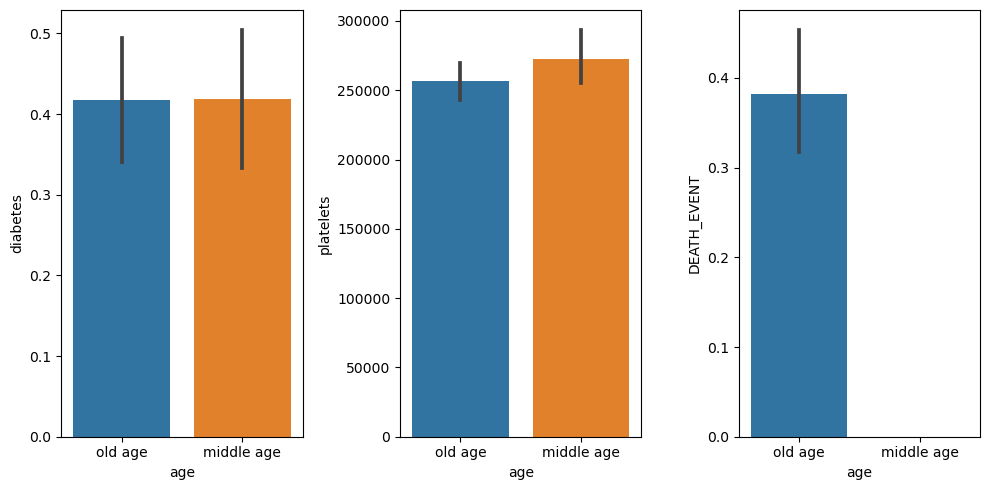

In [29]:
# Hint: sns.barplot(x='',y='',data=)
fig, axs = plt.subplots(1,3, figsize = (10,5))
diabetes = sns.barplot(x = df_new['age'], y = df_new['diabetes'], data = df_new, ax = axs[0])
platelets = sns.barplot(x = df_new['age'], y = df_new['platelets'], data = df_new, ax = axs[1])
death_event = sns.barplot(x = df_new['age'], y = df_old['DEATH_EVENT'], data = df_new, ax = axs[2])

plt.tight_layout()

### Q5. groupby dataframe by <code>age</code> and calculate mean

In [26]:
# Write your code here
grouped = df_new.groupby('age')
df_new_mean = grouped.mean().reset_index()
df_new_mean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex/Week,smoking,DEATH_EVENT
0,middle age,0.395349,686.782946,0.418605,0.310078,272627.428915,1.217132,136.875969,0.643411,0.310078,0.240310
1,old age,0.458824,502.205882,0.417647,0.382353,256324.190706,1.528000,136.435294,0.652941,0.329412,0.382353


<details><summary>Click Here for the Hint</summary>

 

```
    df_avg=df_new.groupby(by='age').mean()
    df_avg.reset_index(inplace=True)

 

```

 

</details>

### Q6. Visualize average <code>platelets</code> for <code>middle age</code> and <code>old age</code> people

In [23]:
# Write your code here
#Assinging average values
old_age_platelets_avg = df_old['platelets'].mean()

In [24]:
middle_age_platelets_avg = df_middle_age['platelets'].mean()

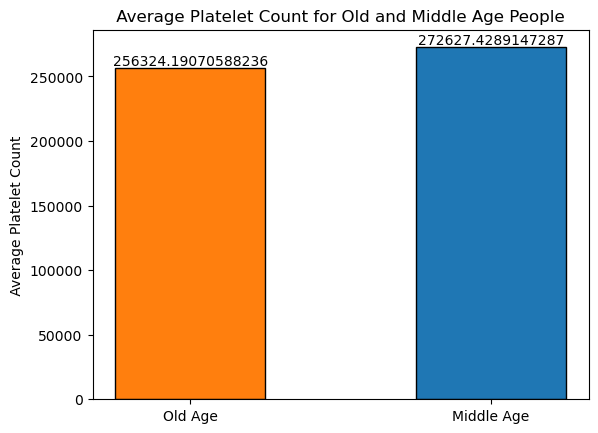

In [34]:
#PLotting Bar Chart 
labels = [ 'Old Age' , 'Middle Age' ]
average = [ old_age_platelets_avg, middle_age_platelets_avg ] 
x = np.arange(len(labels))
width = 0.5
plt.bar( x, average, width, color = ['#FF7F0E', '#1F77B4'], edgecolor = 'black')
plt.xticks(x, labels)
plt.ylabel(' Average Platelet Count ' )
plt.title( ' Average Platelet Count for Old and Middle Age People ' )

for i,avg in enumerate(average):
    plt.text(x[i], avg, str(avg), ha = 'center', va='bottom')
plt.show()


## Assignment Notebook Submission 

Once you complete your notebook you will have to share it. Save all your work and download the file. You will be submitting your notebook for peer review in the next section of the course.



## Author(s)

Aditya Singh

## Changelog
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 1.0 | Aditya | Created new version |
|   |   |   |   |
